In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')


In [4]:
df=df[['v1','v2']]
df['v2'].duplicated()
df['v1'].value_counts()
df=pd.DataFrame({'message':df['v2'],'classify':df['v1']})


In [5]:
df['message'].duplicated()
df['classify'].value_counts()

classify
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
def replace(text):
    if text=='ham':
        return 1
    else:
        return 0

In [7]:
df['classify']=df['classify'].apply(replace)

In [8]:
df['message'].duplicated().sum()
df=df.drop_duplicates(keep='first')


In [9]:
# eda
import seaborn as sns 
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x79464b0eb2d0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

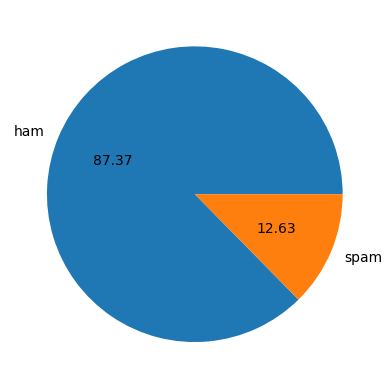

In [10]:
plt.pie(df['classify'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [11]:
#  data is imbalanced


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_char']=df['message'].apply(len)

In [14]:
from nltk.tokenize import word_tokenize
df['words']=df['message'].apply(word_tokenize)


In [15]:
df['no_of_words']=df['words'].apply(len)

In [16]:
df

,message,classify,num_char,words,no_of_words
0,"Go until jurong point, crazy.. Available only ...",1,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,Ok lar... Joking wif u oni...,1,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,U dun say so early hor... U c already then say...,1,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,"Nah I don't think he goes to usf, he lives aro...",1,61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35
5568,Will Ì_ b going to esplanade fr home?,1,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9
5569,"Pity, * was in mood for that. So...any other s...",1,57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15
5570,The guy did some bitching but I acted like i'd...,1,125,"[The, guy, did, some, bitching, but, I, acted,...",27


In [17]:
from nltk.tokenize import sent_tokenize


In [18]:
df['no_sent']=(df['message'].apply(sent_tokenize)).apply(len)

In [19]:
df

,message,classify,num_char,words,no_of_words,no_sent
0,"Go until jurong point, crazy.. Available only ...",1,111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,Ok lar... Joking wif u oni...,1,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,U dun say so early hor... U c already then say...,1,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,"Nah I don't think he goes to usf, he lives aro...",1,61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4
5568,Will Ì_ b going to esplanade fr home?,1,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,1
5569,"Pity, * was in mood for that. So...any other s...",1,57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2
5570,The guy did some bitching but I acted like i'd...,1,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1


In [20]:
from nltk.corpus import stopwords
import string


In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [23]:
df['transformed_text'] = df['message'].apply(transform_text)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [25]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [27]:
X = np.hstack((X,df['num_char'].values.reshape(-1,1)))

In [28]:
X

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [29]:
y = df['classify'].values


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [31]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [32]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [33]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[121  17]
 [ 96 800]]
0.9791921664626683


In [34]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9738878143133463
[[117  21]
 [  6 890]]
0.9769484083424808


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1, 2],
    'binarize': [0.0, None],
    'fit_prior': [True, False]
}

grid = GridSearchCV(
    BernoulliNB(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print(grid.best_params_)


{'alpha': 0.1, 'binarize': 0.0, 'fit_prior': False}


In [36]:
y_pred1 = grid.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9912959381044487
[[130   8]
 [  1 895]]
0.991140642303433


In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,random_state=42)


In [38]:
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[116  22]
 [  8 888]]
0.9758241758241758


In [39]:
from sklearn.svm import SVC
svc = SVC( gamma=1.0)


In [40]:
svc.fit(X_train,y_train)
y_pred1 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8713733075435203
[[  5 133]
 [  0 896]]
0.8707482993197279


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
y_pred1 = knc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8858800773694391
[[ 25 113]
 [  5 891]]
0.8874501992031872
